<a href="https://colab.research.google.com/github/Regina00at/2020-01-20191068-JinaKim-Machine-Learning-Programming/blob/master/lesson6_pets_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'
# pre-setting to use google drive

Mounted at /content/gdrive


# Lesson 6: pets revisited

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

# pre-setting : import necessary things

In [0]:
bs = 64
# batch size = 64

In [0]:
path = untar_data(URLs.PETS)/'images'
# download PETS data from spcified path.

## Data augmentation

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)
# give details of image transforming
# transform more than default.

In [22]:
doc(get_transforms)
# see document of get_transforms function
# check the detail value in the function

In [0]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)
# split the data into training set and test set.
# 80% data will be used to train the model

In [0]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))
# define the "get_data" function

In [25]:
pip install "torch==1.4" "torchvision==0.5.0"
# downgrade the torch version to fix the error

In [0]:
data = get_data(224, bs, 'zeros')
# data = size of 224, batch size above, padding_mode 'zeros'.

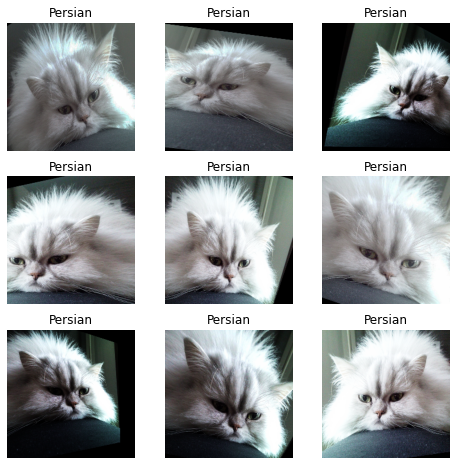

In [27]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))
# define the "_plot" method
# plot one of the data transformed in various ways

In [0]:
data = get_data(224,bs)
# data = size of 224, batch size above, padding_mode 'reflection'.

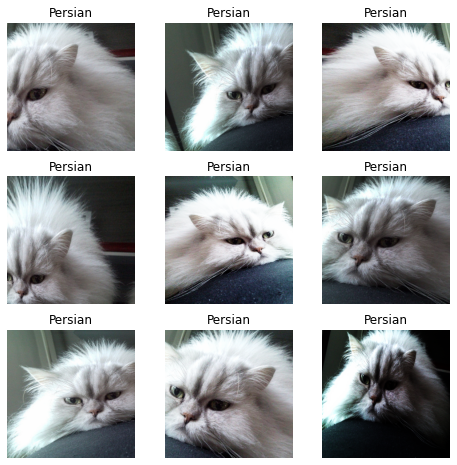

In [29]:
plot_multi(_plot, 3, 3, figsize=(8,8))
# plot one of the data transformed in various ways

## Train a model

In [0]:
gc.collect()
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True)
# use resnet 34 model

In [31]:
learn.fit_one_cycle(3, slice(1e-2), pct_start=0.8)
# train the model for 3 times

epoch,train_loss,valid_loss,error_rate,time
0,1.639220,0.360690,0.094723,01:53
1,0.963224,0.271779,0.089986,01:53
2,0.731812,0.245567,0.074425,01:52


In [32]:
learn.unfreeze()
# unfreeze the model to train it again
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3), pct_start=0.8)
# train the model twice

epoch,train_loss,valid_loss,error_rate,time
0,0.588598,0.247769,0.071719,01:59
1,0.555534,0.235878,0.058863,01:59


In [0]:
data = get_data(352,bs)
# another size of data : 352
learn.data = data
# allocate data into learn.data

In [34]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
# train the model for 2 times

epoch,train_loss,valid_loss,error_rate,time
0,0.515761,0.204331,0.046685,03:39
1,0.479208,0.201284,0.045332,03:39


In [0]:
learn.save('352')
# save it as the size of the model

## Convolution kernel

In [0]:
data = get_data(352,16)
# At this time, lower the batch size.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True).load('352')
# use resnet 34 model, load saved model

Category great_pyrenees

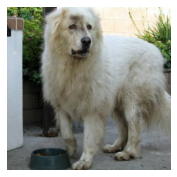

In [38]:
idx=0
x,y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

# bring on of the data, it's great_pyrenees

In [0]:
k = tensor([
    [0.  ,-5/3,1],
    [-5/3,-5/3,1],
    [1.  ,1   ,1],
]).expand(1,3,3,3)/6

# expand : need two more dimension. (RGB)

In [40]:
k
# show the k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

In [41]:
k.shape
# k is 3 by 3 kernel

torch.Size([1, 3, 3, 3])

In [42]:
t = data.valid_ds[0][0].data; t.shape
# bring one of the validation data

torch.Size([3, 352, 352])

In [43]:
t[None].shape
# show the shape of validation data set

torch.Size([1, 3, 352, 352])

In [0]:
edge = F.conv2d(t[None], k)
# calling conv2d => pass in some images

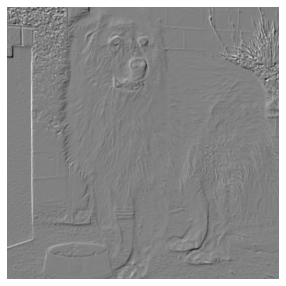

In [45]:
show_image(edge[0], figsize=(5,5));
# show the dimensional lowered image 

In [46]:
data.c
# the amount of classes of this dataset

37

In [47]:
learn.model
# print the information of the model we use

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [48]:
print(learn.summary())
# summarize the information above

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 176, 176]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
ReLU                 [64, 176, 176]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
___________________________________________________

## Heatmap

In [0]:
m = learn.model.eval();
# m = convolutional part of the model

In [0]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()
# preprocessing the data

In [0]:
from fastai.callbacks.hooks import *
# import fastai.callbacks.hooks library

In [0]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g
# define hooked_backward function
# return tuple

In [0]:
hook_a,hook_g = hooked_backward()
# allocate return value of hooked_backward function

In [54]:
acts  = hook_a.stored[0].cpu()
acts.shape
# acts = first dataset of hook_a

torch.Size([512, 11, 11])

In [55]:
avg_acts = acts.mean(0)
avg_acts.shape
# avg_acts is one of the image of the data
# print the shape of avg_acts 

torch.Size([11, 11])

In [0]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');
# define the show_heatmap function

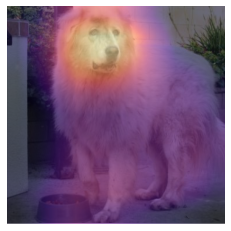

In [57]:
show_heatmap(avg_acts)
# show the heatmap of the picture

## Grad-CAM

Paper: [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)

In [58]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape,grad_chan.shape
# shape of the grad, grad_cahn? (torch.Size([512, 11, 11]), torch.Size([512]))

(torch.Size([512, 11, 11]), torch.Size([512]))

In [0]:
mult = (acts*grad_chan[...,None,None]).mean(0)

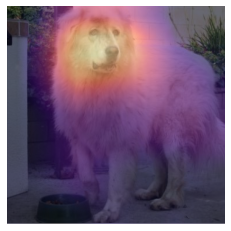

In [60]:
show_heatmap(mult)
# show the heatmap of the picture

In [0]:
fn = '/content/gdrive/My Drive/fastai-v3/Great_Pyrenees.jpg' #Replace with your own image

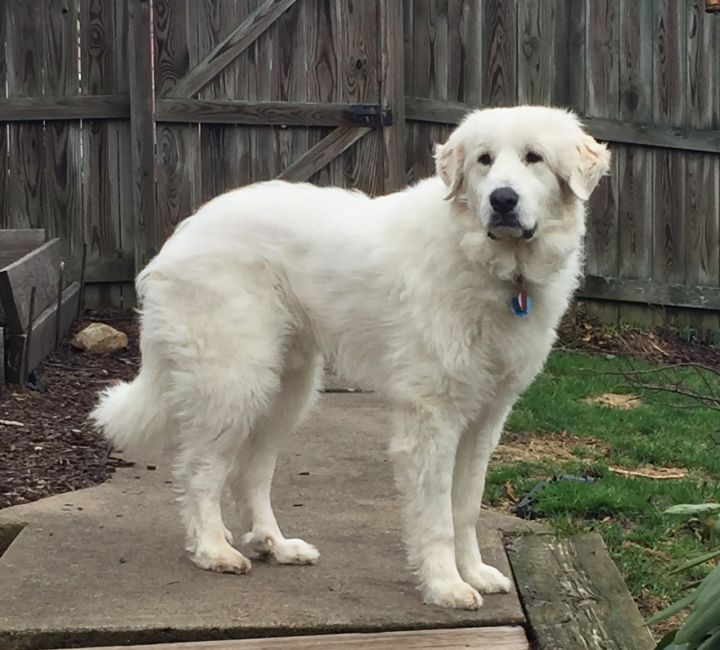

In [78]:
x = open_image(fn); x
# open the uploaded image

In [0]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()
# do same thing with above

In [0]:
hook_a,hook_g = hooked_backward()
# put my picture in hook_a,g

In [0]:
acts = hook_a.stored[0].cpu()
grad = hook_g.stored[0][0].cpu()

grad_chan = grad.mean(1).mean(1)
mult = (acts*grad_chan[...,None,None]).mean(0)
# put my image at very first

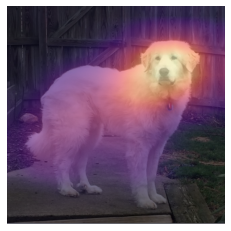

In [82]:
show_heatmap(mult)
# show the heatmap of my picture

In [83]:
data.classes[0]
# number zero class name?

'Abyssinian'

In [0]:
hook_a,hook_g = hooked_backward(0)
# my picutre was put at the very first of hooked_backward, bringing the number zero data means bring my picture data

In [0]:
acts = hook_a.stored[0].cpu()
grad = hook_g.stored[0][0].cpu()

grad_chan = grad.mean(1).mean(1)
mult = (acts*grad_chan[...,None,None]).mean(0)
# do the same thing as above

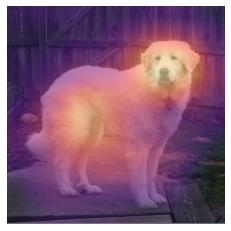

In [86]:
show_heatmap(mult)
# print again.

## fin